# Why Are Roulette Tables Green? (Fake Paper)
---
### The Effect of Background Color on Risk-Taking in Decision-Making Tasks



## Abstract 
This study investigates the effect of background color on risk-taking behavior in a simple decision-making task. Sixty participants were randomly assigned to one of three groups, each exposed to a different background color: red, green, or gray (control). Participants completed a series of choices between a guaranteed monetary reward and a riskier option with equal probability of a higher or zero payoff. Results suggest that background color influenced decision-making tendencies, with participants in the red condition displaying more risk-averse behavior compared to those in the green and control conditions. These findings support the hypothesis that color can subconsciously influence cognitive processes related to risk assessment. The experiment was designed for ease of replication, contributing to the broader understanding of environmental factors in decision-making psychology.

## Motivation for this notebook

This paper is provided as both a Jupyter notebook and an HTML file, along with a corresponding checksum to support reproducibility. To verify the integrity of the HTML file, you can generate a checksum of your version and compare it with the one provided in the documentation. All required dependencies are managed via the included Makefile to ensure a consistent and reproducible environment.

If you do not have the commandline interface software tool `make` installed on your system, please install it first. Before running the notebook, please make sure to install the necessary packages by executing:

```bash
make setup
```

This command will create a virtual environment (if not already present) and install all required Python packages listed in requirements.txt. Once the setup is complete, you can launch the notebook with:

```bash
make notebook
```
You may also regenerate the HTML file using the followingcommand and compare it to the original:

```bash 
make html
``` 


This approach guarantees that everyone working with the notebook uses the exact same package versions, minimizing environment-related issues and maximizing reproducibility.

For better comparability, we provide our own system specifications:

- Operating System: Windows 11 Pro (Version: 24H2, Build: 26100.4061)
- Python Version: 3.13.2
- Jupyter Notebook Version: 7.2.2
- Make Tool Version: 3.81

## Introduction
Color is a subtle yet powerful element of our environment that can influence perception, emotion, and behavior. Previous research in psychology and marketing has suggested that specific colors may trigger distinct cognitive or emotional responses. For instance, the color red is often associated with danger, caution, or error, potentially leading to more conservative behavior, while green is commonly linked to safety, permission, and growth, which may promote more exploratory or risk-tolerant choices. Decision-making under risk is a key area in behavioral research, particularly in understanding how seemingly irrelevant contextual factors can bias judgment. While much attention has been paid to economic incentives and personality traits, less is known about how visual cues like background color may shape risk preferences. This study aims to investigate whether background color affects risk-taking in a simple monetary decision-making task. It is hypothesized that participants exposed to a red background will make more risk-averse choices compared to those exposed to green or neutral (gray) backgrounds. By isolating color as a single variable, this experiment seeks to contribute to our understanding of environmental influences on decision-making and assess whether such effects are robust and reproducible.

## Method
### Participants
Sixty participants (N = 60) were recruited from a university student pool and randomly assigned to one of three experimental conditions: Red, Green, or Gray. Each group consisted of 20 participants. All participants reported normal or corrected-to-normal vision and no color blindness, and gave informed consent prior to participation.

### Design
The study employed a between-subjects design. The independent variable was the color of the tablecloth (red, green, or gray), while the dependent variable was the number of risky choices, the highest consecutive steak of risky choices and the decision time made by each participant during the task.

### Materials
The experiment was conducted in a neutral, quiet room. In the center of the room was a table covered with either a red, green, or gray tablecloth depending on the participant’s assigned condition. On the table were two large buzzer buttons, one labeled “Safe” and the other “Risk”. These buttons were used by participants to indicate their choices during the task.

The decision-making task consisted of 10 trials. On each trial, participants chose between:

- A safe option: a guaranteed €5
- The risky option: consisting of a 50% chance to win a predefined reward (ranging from €7 to €17) or nothing. 

All participants get the same risky reward questions in a random order. They were informed that one of their 10 choices would be randomly selected and honored for real payout at the end of the experiment to encourage genuine decision-making.

### Procedure
Participants were brought individually into the testing room and seated at the table. They were given standardized verbal instructions explaining the task and the meaning of the two buzzers. Each trial was read aloud by the experimenter, who reminded the participant of the two options. Participants then made their selection by pressing either the Safe or Risk buzzer. The tablecloth color remained constant throughout the session and was the only visual cue varied between groups. The session took approximately 10 minutes per participant, and all choices were recorded manually by the experimenter.

## Results

In this section, we present the results of the experiment. To generate the results using the provided code, ensure that the `data.csv` file is present in the current working directory.

The analysis begins by calculating the mean and standard deviation of the results for each group. These descriptive statistics serve as the basis for conducting a one-way ANOVA, which tests for statistically significant differences between the means of the three groups.

If the ANOVA indicates significant differences, a post-hoc Tukey-Kramer test is performed to identify which specific groups differ from each other.


In [22]:
# Import necessary libraries
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Load CSV data
df = pd.read_csv("data.csv")

# Group data
grouped = df.groupby("Group")["NumRiskyChoices"]

# Calculate means and standard deviations
for group, data in grouped:
    print(f"{group} group: Mean = {data.mean():.2f}, SD = {data.std():.2f}")

# One-way ANOVA
red = df[df["Group"] == "Red"]["NumRiskyChoices"]
green = df[df["Group"] == "Green"]["NumRiskyChoices"]
gray = df[df["Group"] == "Gray"]["NumRiskyChoices"]

f_val, p_val = stats.f_oneway(red, green, gray)
print(f"\nANOVA result: F = {f_val:.2f}, p = {p_val:.4f}")

# Tukey's HSD post-hoc test
tukey = pairwise_tukeyhsd(endog=df["NumRiskyChoices"], groups=df["Group"], alpha=0.05)
print("\nTukey's HSD results:")
print(tukey)


Gray group: Mean = 4.90, SD = 0.72
Green group: Mean = 6.35, SD = 0.93
Red group: Mean = 3.60, SD = 1.23

ANOVA result: F = 39.12, p = 0.0000

Tukey's HSD results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  Gray  Green     1.45 0.0001  0.7015  2.1985   True
  Gray    Red     -1.3 0.0003 -2.0485 -0.5515   True
 Green    Red    -2.75    0.0 -3.4985 -2.0015   True
----------------------------------------------------


The means and standard deviations suggest that participants in the red condition were more risk-averse, while those in the green condition took more risks. The analysis of the one-way ANOVA test revealed a significant effect of background color on the number of risky choices. The Post-hoc Tukey tests showed:
- The green group made significantly more risky choices than the red group
- The gray (control) group differed significantly from the green group, but not from the red group

### Risk Behavior Over Time

To further investigate decision-making behavior, we analyzed the longest consecutive streaks of risky choices made by each participant. This metric, labeled HighestStreak, provides insight into consistency or momentum in risk-taking behavior. Participants in the green condition exhibited significantly longer risky choice streaks compared to those in the red condition and the gray condition. This pattern reinforces our main finding, suggesting not only that green environments promote more risk-taking overall, but also foster more sustained periods of risky decision-making. Red environments, in contrast, were associated with short and sporadic risk-taking, indicating more cautious and interrupted behavior patterns.

Average Highest Streak per Group:
       mean       std
Group                
Gray    3.9  0.718185
Green   5.4  1.142481
Red     1.9  0.788069

ANOVA result: F = 75.75, p = 0.0000

Tukey HSD for Highest Streak:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  Gray  Green      1.5   0.0  0.8134  2.1866   True
  Gray    Red     -2.0   0.0 -2.6866 -1.3134   True
 Green    Red     -3.5   0.0 -4.1866 -2.8134   True
---------------------------------------------------


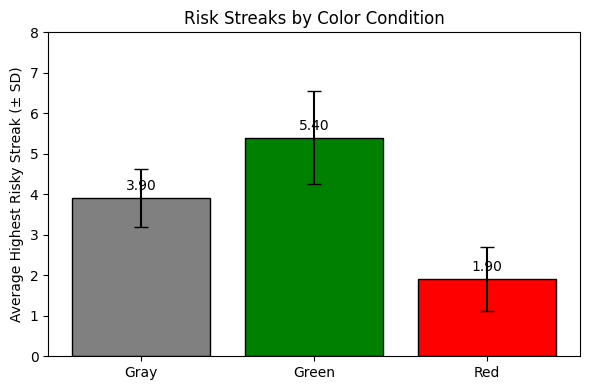

In [23]:
# Group statistics
group_stats = df.groupby("Group")["HighestStreak"].agg(['mean', 'std'])

print("Average Highest Streak per Group:")
print(group_stats)

# ANOVA
red = df[df["Group"] == "Red"]["HighestStreak"]
green = df[df["Group"] == "Green"]["HighestStreak"]
gray = df[df["Group"] == "Gray"]["HighestStreak"]

f_val, p_val = stats.f_oneway(red, green, gray)
print(f"\nANOVA result: F = {f_val:.2f}, p = {p_val:.4f}")

# Tukey's HSD
tukey = pairwise_tukeyhsd(endog=df["HighestStreak"], groups=df["Group"], alpha=0.05)
print("\nTukey HSD for Highest Streak:")
print(tukey)

# Visualization
colors = {'Red': 'red', 'Green': 'green', 'Gray': 'gray'}
group_stats["color"] = [colors[group] for group in group_stats.index]

plt.figure(figsize=(6, 4))
bars = plt.bar(group_stats.index, group_stats["mean"],
               yerr=group_stats["std"], capsize=5,
               color=group_stats["color"], edgecolor='black')

plt.ylabel("Average Highest Risky Streak (± SD)")
plt.title("Risk Streaks by Color Condition")
plt.ylim(0, 8)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2,
             f'{height:.2f}', ha='center')

plt.tight_layout()
plt.show()

### Reaction Time and Decision-Making

In addition to the number of risky choices and highest risky streak, the analysis of participants’ average reaction times revealed notable differences between groups. Participants in the red condition exhibited longer average reaction times, suggesting increased deliberation or hesitation when making decisions under a red background. Conversely, participants in the green condition showed shorter reaction times, indicating quicker, potentially more impulsive choices. The gray group’s reaction times fell between these extremes, consistent with its role as a neutral control condition. These findings complement the behavioral data by suggesting that color cues may not only influence the propensity to take risks but also affect the cognitive processing speed underlying decision-making. Longer reaction times in the red condition may reflect heightened caution or conflict, while the quicker responses in the green condition align with greater risk tolerance.

<Figure size 800x600 with 0 Axes>

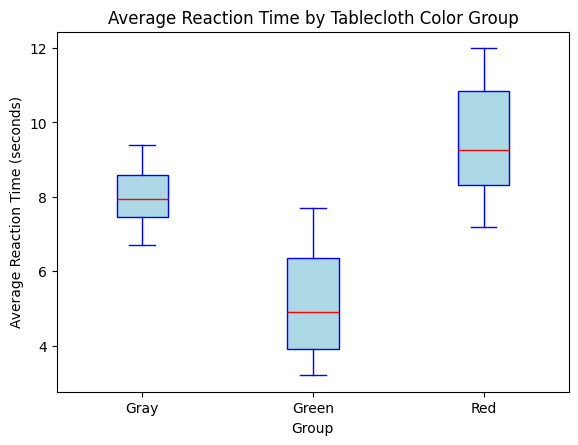

In [24]:
plt.figure(figsize=(8,6))

# Boxplot of AvgReactionTime by Group
df.boxplot(column="AvgReactionTime", by="Group", grid=False,
           patch_artist=True,
           boxprops=dict(facecolor="lightblue", color="blue"),
           medianprops=dict(color="red"),
           whiskerprops=dict(color="blue"),
           capprops=dict(color="blue"),
           flierprops=dict(marker='o', color='blue', alpha=0.5))

plt.title("Average Reaction Time by Tablecloth Color Group")
plt.suptitle("")  # Suppress the default title
plt.xlabel("Group")
plt.ylabel("Average Reaction Time (seconds)")
plt.show()

## Discussion

The results of this study support the hypothesis that background color influences risk-taking behavior. Participants exposed to a red background made significantly fewer risky choices compared to those in the green condition, suggesting that color cues can subconsciously shape decision-making. The control group (gray) fell between the two, further reinforcing the idea that red tends to promote caution, while green encourages more risk-tolerant behavior.

These findings align with previous research suggesting that red is associated with danger, warning, or avoidance behaviors, potentially activating a more conservative mindset. In contrast, green is commonly linked to safety, positivity, and forward action, which may explain the increase in risk-taking in that group.

The experiment demonstrates that even minimal and seemingly irrelevant environmental cues, such as background color, can influence cognitive processes related to decision-making. This has practical implications for interface design, marketing, and behavioral nudges in digital environments.

An additional analysis of participants’ average reaction times provided further insight into the cognitive mechanisms underlying these behavioral differences. Participants in the red condition showed longer reaction times, suggesting greater deliberation or hesitation when making decisions under a red background. Conversely, the green group responded more quickly, consistent with more impulsive or confident decision-making. The gray group’s reaction times were intermediate, in line with their risk-taking behavior.

This pattern of reaction times complements the risk-taking data, indicating that color cues not only affect the choices made but also the cognitive processing speed during decision-making. Longer reaction times under red may reflect increased caution or internal conflict, while shorter reaction times under green may signal reduced inhibition and increased risk tolerance. Although the amount of money involved in each risky choice was kept constant across participants to control for its influence, future studies could explore how varying stakes interact with color cues and reaction times.

Together, these findings suggest that environmental color can subtly influence both the outcomes and dynamics of decision-making, highlighting the importance of considering such factors in contexts where risk assessment is critical.

## Limitations
While the results were statistically significant, the study has some limitations. The sample size was relatively small and consisted solely of university students, which may limit the generalizability of the findings. Additionally, the task was artificial and may not fully reflect real-world decision-making under risk.

## Future Directions
Future research could explore the effects of other colors (e.g., blue, yellow), examine gender or cultural differences in color perception, or use more complex decision-making tasks that more closely resemble real-life choices. It would also be valuable to replicate the study with a larger and more diverse sample to assess robustness. It is also worth noting that the absolute amounts of money used in the decision-making task could influence participants’ risk preferences. For example, individuals may perceive a €15 reward as more enticing—and therefore more worth the risk—than a €7 reward. However, because all participants were presented with the same set of 10 trials in randomized order, this potential effect was held constant across all conditions and thus was not expected to bias the comparison between color groups. Future work may involve exploring the impact of the amount of money granted and determining a threshold for the different groups of participants.

## Conclusion
In conclusion, this study provides evidence that background color can influence risk
preferences in a simple decision-making task. These results contribute to our
understanding of how subtle contextual factors can affect behavior and underscore the importance of considering environmental design in areas where decisions are made.

## References

- Elliot, A. J., & Maier, M. A. (2014). Color psychology: Effects of perceiving color on psychological functioning in humans. *Annual Review of Psychology*, 65, 95–120.
- Kouchaki, M., & Smith, I. H. (2014). The morning morality effect: The influence of time of day on unethical behavior. *Psychological Science*, 25(1), 95–102.
- Mehta, R., & Zhu, R. (2009). Blue or red? Exploring the effect of color on cognitive task performances. *Science*, 323(5918), 1226–1229.
- Soldat, A. S., Sinclair, R. C., & Mark, M. M. (1997). Color as an environmental processing cue: External information and color can influence performance. *Journal of Experimental Social Psychology*, 33(4), 368–378.
- Zhou, X., & Pham, M. T. (2004). Promotion and prevention across mental accounts: When financial products dictate consumers’ investment goals. *Journal of Consumer Research*, 31(1), 125–135.
